# How to get 1-day of options data

Go to the [Tardis Documentation:](https://docs.tardis.dev/downloadable-csv-files#options_chain) and `Deribit options chain for 2020-03-01`

This will download a *.csv.gz file of the data. This is quite large with 10.8M rows and after unzipping it is 2.9GB large.

In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv('deribit_options_chain_2020-03-01_OPTIONS.csv.gz',compression='gzip') # 13 m rows
df.shape

(10819262, 24)

In [2]:
df.head()

,exchange,symbol,timestamp,local_timestamp,type,strike_price,expiration,open_interest,last_price,bid_price,...,ask_iv,mark_price,mark_iv,underlying_index,underlying_price,delta,gamma,vega,theta,rho
0,okex-options,BTC-USD-200327-10500-P,1583020800666000,1583020801502613,put,10500,1585296000000000,7,0.2025,0.2115,...,0.8594,0.224348,0.6647,BTC-USD,NaN,-1.059442,2.438221,0.000661,-0.000819,NaN
1,okex-options,BTC-USD-200626-5000-P,1583020801283000,1583020801502645,put,5000,1593158400000000,1,0.0105,0.0100,...,0.7324,0.010112,0.7096,BTC-USD,NaN,-0.061137,0.321611,0.000594,-0.000180,NaN
2,okex-options,BTC-USD-200626-24000-C,1583020801283000,1583020801502662,call,24000,1593158400000000,3,0.0150,0.0125,...,0.9912,0.012853,0.9765,BTC-USD,NaN,0.051962,0.176495,0.000717,-0.000298,NaN
3,okex-options,BTC-USD-200626-13000-P,1583020801283000,1583020801502677,put,13000,1593158400000000,0,NaN,0.5035,...,0.7813,0.511247,0.7468,BTC-USD,NaN,-1.263106,2.008358,0.001789,-0.000564,NaN
4,okex-options,BTC-USD-200626-16000-P,1583020801283000,1583020801502711,put,16000,1593158400000000,0,NaN,0.7600,...,1.1792,0.825743,0.8105,BTC-USD,NaN,-1.677105,2.178579,0.001307,-0.000443,NaN


In [13]:
df['symbol'].value_counts()

ETH-6MAR20-210-C     35233
ETH-26JUN20-720-P    32969
ETH-6MAR20-220-C     30987
ETH-6MAR20-230-P     30862
ETH-6MAR20-220-P     29608
                     ...  
ETH-1MAR20-245-C      5139
ETH-3MAR20-195-C      5104
ETH-3MAR20-195-P      4993
ETH-3MAR20-190-C      2306
ETH-3MAR20-190-P      2302
Name: symbol, Length: 650, dtype: int64

The naming convention for the `symbol` column 

<blockquote>
The symbol of an options contract consists of Underlying asset-Expiry date-Strike price-Option's type (C - call/ P - put).

Example:

BTC-30MAR2019-10000-C

This is a call option (C), with a strike price of 10,000 USD, expiring on March 30, 2019.
</blockquote> 

[Deribit Documentation:](https://legacy.deribit.com/pages/docs/options)

On 2020-03-01 there were 650 unique options

In [18]:
df.columns

Index(['exchange', 'symbol', 'timestamp', 'local_timestamp', 'type',
       'strike_price', 'expiration', 'open_interest', 'last_price',
       'bid_price', 'bid_amount', 'bid_iv', 'ask_price', 'ask_amount',
       'ask_iv', 'mark_price', 'mark_iv', 'underlying_index',
       'underlying_price', 'delta', 'gamma', 'vega', 'theta', 'rho'],
      dtype='object')

(array([  17902.,   65983.,   88495.,   90751.,  101289.,  182474.,
         227019.,  611779., 1270732., 8162838.]),
 array([-46.58242 , -41.924178, -37.265936, -32.607694, -27.949452,
        -23.29121 , -18.632968, -13.974726,  -9.316484,  -4.658242,
          0.      ]),
 <BarContainer object of 10 artists>)

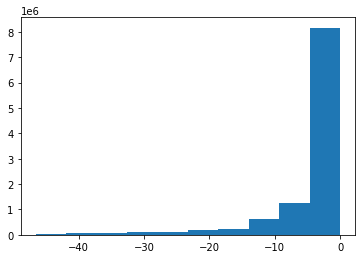

In [20]:
import matplotlib.pyplot as plt
plt.hist(df['theta'])